In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [3]:
response = requests.get(endpoint)

In [4]:
response

<Response [200]>

In [5]:
result = response.json()

In [6]:
result

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [7]:
search_dict = {}
for line in result:
    count = int(line.get('query_count'))
    text = line.get('query_text')
    if text in search_dict:
        search_dict[text] += count
    else:
        search_dict[text] = count

In [8]:
search_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
search_df = search_df.reset_index()
search_df.columns = ['term', 'text']
search_df.head()

,term,text
0,ebid,521
1,property maps,252
2,maps,237
3,property tax,214
4,jobs,210


In [9]:
search_df = search_df.sort_values('text', ascending=False)
search_df.head(10)

,term,text
0,ebid,521
1,property maps,252
2,maps,237
10,property taxes,235
3,property tax,214
4,jobs,210
5,employment,189
7,police,167
8,criminal court clerk,167
9,media releases,165


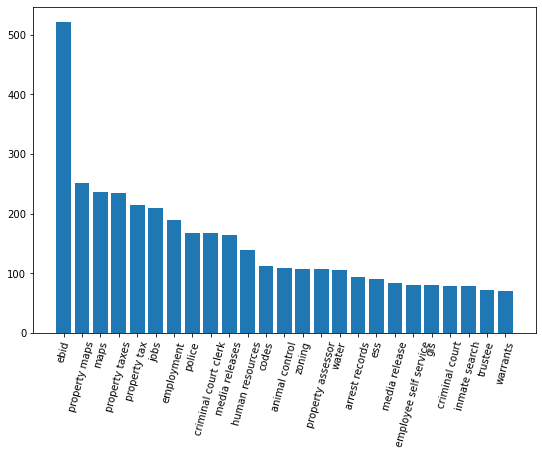

In [10]:
plt.figure(figsize=(9,6))
plt.bar('term', 'text', data = search_df.head(25))
plt.xticks(rotation = 75);

#API request months where "fire" was searched in 2016

In [11]:
scan = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire')

In [12]:
scan

<Response [200]>

In [13]:
fire =scan.json()
fire

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

#Creating a dataframe 

In [14]:
fire_df =pd.DataFrame.from_dict(fire)


In [15]:
fire_df

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


#August 2016 "fire" was searched 47 times.

In [16]:
fire_df.loc[fire_df.query_count== fire_df.query_count.max()]

,month_name,year,query_count,query_text
7,August,2016,47,fire


In [17]:
fire_df =pd.DataFrame.from_dict(fire)
rows = fire_df.iloc[7]
print(rows)

month_name     August
year             2016
query_count        47
query_text       fire
Name: 7, dtype: object


 #Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  



In [18]:
times =requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=1500&$where=query_count>100')
times

<Response [200]>

In [19]:
times = times.json()
times

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

# Creating DataFrame called times_df

In [20]:
times_df = pd.DataFrame.from_dict(times)

In [21]:
times_df

,month_name,year,query_count,query_text,month
0,March,2014,101,permits,NaN
1,January,2015,101,criminal court clerk,NaN
2,September,2015,101,codes,NaN
3,March,2016,101,police,NaN
4,March,2016,101,civil service,NaN
...,...,...,...,...,...
1257,September,2018,750,annual enrollment,NaN
1258,October,2018,816,annual enrollment,NaN
1259,January,2019,2646,Nashville,1
1260,September,2019,5327,directory,9


# print to get all the results of times DataFrame

In [22]:
print(times_df.shape[0])

1262


In [23]:
print(times_df.count())

month_name     1262
year           1262
query_count    1262
query_text     1262
month           491
dtype: int64


#Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur? 

In [24]:
codes = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=1500&query_text=codes&$where=query_count>100')

In [25]:
codes

<Response [200]>

In [26]:
codes_df = pd.DataFrame.from_dict(codes.json())

In [27]:
codes_df

,month_name,year,query_count,query_text,month
0,September,2015,101,codes,NaN
1,April,2021,102,codes,4
2,August,2016,104,codes,NaN
3,November,2020,104,codes,11
4,December,2017,106,codes,NaN
5,May,2016,107,codes,NaN
6,April,2016,111,codes,NaN
7,July,2021,114,codes,7
8,January,2017,115,codes,NaN
9,May,2021,115,codes,5


In [28]:
len(codes_df)

56

#4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

# Requesting API the number of time map was search

In [29]:
maps = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?$select&query_text=maps')

In [30]:
maps

<Response [200]>

#Creating maps DataFrame

In [31]:
maps_df = pd.DataFrame.from_dict(maps.json())

In [32]:
maps_df

,month_name,year,query_count,query_text,month
0,January,2014,97,maps,NaN
1,February,2014,140,maps,NaN
2,March,2014,144,maps,NaN
3,April,2014,152,maps,NaN
4,May,2014,119,maps,NaN
...,...,...,...,...,...
77,November,2020,86,maps,11
78,December,2020,113,maps,12
79,March,2021,132,maps,3
80,April,2021,148,maps,4


In [33]:
maps_df.query_count=pd.to_numeric(maps_df.query_count)

In [34]:
grouped = maps_df.groupby(['month_name']).sum()

In [35]:
grouped = grouped.reset_index()

In [36]:
grouped

,month_name,query_count
0,April,1309
1,August,991
2,December,556
3,February,832
4,January,924
5,July,1062
6,June,1216
7,March,1090
8,May,1019
9,November,805


In [37]:
new_index = [4,3,7,0,8,6,5,1,11,9,2]
grouped = grouped.reindex(new_index)
grouped

,month_name,query_count
4,January,924
3,February,832
7,March,1090
0,April,1309
8,May,1019
6,June,1216
5,July,1062
1,August,991
11,September,951
9,November,805


<BarContainer object of 11 artists>

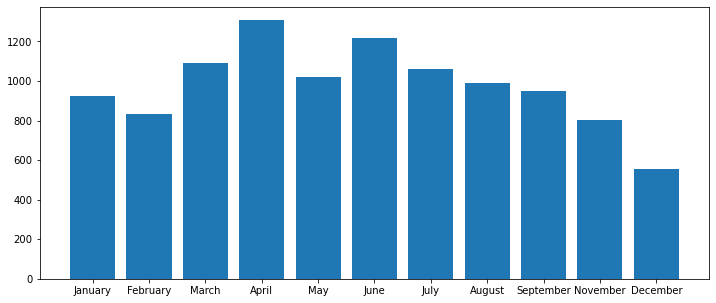

In [38]:
fig = plt.figure(figsize = (12,5))
plt.bar(grouped.month_name, grouped.query_count)

In [64]:
# Make an API request to pull back all the data from [hubNashville (311) Service Requests]
#(https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh)
#(check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly 
#Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one) 


In [65]:
hub = requests.get('https://data.nashville.gov/resource/7qhx-rexh.json?$limit=906000')

In [66]:
hub

<Response [200]>

In [67]:
hub_df = pd.DataFrame.from_dict(hub.json())

In [68]:
hub_df

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,...,:@computed_region_v67z_xm3t,:@computed_region_kh5x_g7w5,:@computed_region_cfa7_hbpz,:@computed_region_sjpq_96s8,:@computed_region_gisn_y5cm,:@computed_region_b9k3_hpc2,parent_case,oem_id,contact_type,preferred_language
0,890432,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2022-02-08T22:26:54.000,2022-02-09T21:36:17.000,hubNashville Community,False,False,...,2,3,744,1527,4,2,NaN,NaN,NaN,NaN
1,889750,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,2022-02-08T15:24:31.000,2022-02-09T21:36:09.000,hubNashville Community,False,False,...,1,14,642,15798,8,1,NaN,NaN,NaN,NaN
2,889990,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2022-02-08T17:54:14.000,2022-02-09T21:32:43.000,Phone,False,False,...,7,7,14,15548,2,7,NaN,NaN,NaN,NaN
3,887729,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2022-02-04T23:29:13.000,2022-02-28T21:46:54.000,hubNashville Community,False,False,...,8,30,667,24062,7,8,NaN,NaN,NaN,NaN
4,890361,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Backdoor,2022-02-08T21:45:29.000,2022-02-28T21:49:05.000,Phone,False,False,...,4,20,122,15807,3,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904845,747,Closed,"Trash, Recycling & Litter",Residential Dumpster Services,Missed Dumpster Trash Service,2017-07-18T13:19:00.000,2017-07-26T08:47:00.000,Phone,FALSE,TRUE,...,7,7,NaN,15548,2,7,NaN,NaN,NaN,NaN
904846,817299,Closed,Customer Experience Surveys,Parks - 2021 Electric Bike Greenway Access Survey,Parks - 2021 Electric Bike Greenway Access Survey,2021-11-03T09:27:00.000,2021-11-03T09:27:00.000,hubNashville Community,FALSE,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904847,3615,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,2017-07-31T14:50:00.000,2017-08-02T04:03:00.000,Phone,FALSE,TRUE,...,8,27,131,16166,7,8,NaN,NaN,Resident,NaN
904848,1763,Closed,"Streets, Roads & Sidewalks",Illegal Dumping,Roadway,2017-07-21T12:37:00.000,2017-07-28T16:22:00.000,Phone,FALSE,TRUE,...,2,10,425,1527,4,2,NaN,NaN,NaN,NaN


#Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets

#Requesting API Nashille Parks Special Events Permits

In [69]:
permits = requests.get('https://data.nashville.gov/resource/vygj-v677.json?$limit=3300')

In [70]:
permits

<Response [200]>

In [57]:
permits_df =pd.DataFrame.from_dict(permits.json())

In [59]:
permits_df

,month,year,event,date,event_end_date,attendance,location,event_type
0,October,2020,Old School R and B Festival,2021-10-02T00:00:00.000,2021-10-03T00:00:00.000,5000,Riverfront Park,Public
1,December,2020,Richland Park Farmers Market,2020-12-26T00:00:00.000,2020-12-26T00:00:00.000,25,Richland Park,Public
2,December,2020,Richland Park Farmers Market,2020-12-19T00:00:00.000,2020-12-19T00:00:00.000,25,Richland Park,Public
3,December,2020,Richland Park Farmers Market,2020-12-12T00:00:00.000,2020-12-12T00:00:00.000,25,Richland Park,Public
4,December,2020,Shelby Park Pickup Volunteer Event,2020-12-12T00:00:00.000,2020-12-12T00:00:00.000,50,Shelby Park,Public
...,...,...,...,...,...,...,...,...
3288,March,2014,Mardi Gras Y'all Street Festival,2014-03-01T00:00:00.000,2014-03-01T00:00:00.000,15000,Riverfront Park,Public
3289,February,2014,Race Judicata,2014-02-22T00:00:00.000,2014-02-22T00:00:00.000,500,Warner Park,Public
3290,February,2014,Hot Chocolate 5K/15K,2014-02-15T00:00:00.000,2014-02-15T00:00:00.000,10000,Centennial Park,Public
3291,February,2014,Cupid's Chase 5k,2014-02-08T00:00:00.000,2014-02-08T00:00:00.000,400,Shelby Park and Greenway,Public


#Requesting API Property Standards Violations

In [60]:
beer = requests.get('https://data.nashville.gov/resource/3wb6-xy3j.json?$limit=3000')

In [61]:
beer

<Response [200]>

In [62]:
beer_df = pd.DataFrame.from_dict(beer.json())

In [63]:
beer_df

,permit_number,status,permit_type,permit_subtype,sub_type_description,date_entered,date_issued,parcel,business_name,address,...,council_district,census_tract,mapped_location,:@computed_region_c9xn_skx3,:@computed_region_sjpq_96s8,:@computed_region_v3ji_vzam,:@computed_region_gisn_y5cm,:@computed_region_f73m_vb2k,business_owner,:@computed_region_cfa7_hbpz
0,19-25846,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2019-01-24T00:00:00.000,2019-06-03T00:00:00.000,16300030200,EXO-TIKKA INDIAN CUSINE,5385 MT VIEW RD,...,32,37015629,"{'latitude': '36.047649', 'longitude': '-86.64...",30,24062,2005,7,8,NaN,NaN
1,16-20340,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2016-05-18T00:00:00.000,2016-09-23T00:00:00.000,09114025000,Las Palmas Mexican Restaurant,5821 Charlotte PIKE,...,20,37018101,"{'latitude': '36.149076', 'longitude': '-86.86...",14,15798,2005,8,5,"Las Palmas Mexican Restaurant Inc, Qurino Onate",NaN
2,17-00205,ISSUED,BBPERMIT,WHOLESALES,"BB - Wholesale, Distributor",2016-11-03T00:00:00.000,2017-07-10T00:00:00.000,09112001600,Fat Bottom Brewing,800 44th AVE N,...,20,37013300,"{'latitude': '36.157013', 'longitude': '-86.83...",14,15798,2005,8,1,Fat Bottom Brewing Inc,642
3,19-25920,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,2019-03-06T00:00:00.000,2019-06-13T00:00:00.000,11714013900,NASHVILLE CIGAR,4001 HILLSBORO PIKE,...,25,37017901,"{'latitude': '36.104329', 'longitude': '-86.81...",23,15809,2005,5,6,686 Bluberry Hill Road,NaN
4,19-25985,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,2019-04-22T00:00:00.000,2019-06-13T00:00:00.000,08305018200,TAILGATE BREWERY EAST NASHVILLE,811 GALLATIN AVE,...,6,37011700,"{'latitude': '36.186415', 'longitude': '-86.74...",7,15548,2005,2,7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,21-27475,ISSUED,BBPERMIT,OFFSALES,BB - Off Site Sales,2021-11-15T00:00:00.000,2022-01-13T00:00:00.000,10214011000,SUDDEN SERVICE #8897,6955 CHARLOTTE PIKE,...,22,37018301,"{'latitude': '36.129566', 'longitude': '-86.90...",35,15798,2005,8,5,"Leslie Evans Cherry, Steven Ray Hostetter",NaN
2025,21-27171,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2021-04-14T00:00:00.000,2022-01-13T00:00:00.000,09109003200,TEE LINE CURLING & BOWLING CENTER,106 DULUTH AVE,...,20,37013202,"{'latitude': '36.157875', 'longitude': '-86.86...",14,15798,2005,8,5,NaN,1084
2026,21-27059,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,2021-01-26T00:00:00.000,2022-03-11T00:00:00.000,093063A00300CO,THE TWELVE THIRTY CLUB,550 BROADWAY,...,19,37019500,"{'latitude': '36.160264', 'longitude': '-86.77...",13,30406,2005,1,7,James Liautaud (100% owner of 5B Investors LLC...,NaN
2027,22-27569,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,2022-01-24T00:00:00.000,2022-03-11T00:00:00.000,16500000000001,FOUR CORNERS MARINA,4027 LAVERGNE COUCHVILLE PIKE,...,NaN,15607128,"{'latitude': '36.053051', 'longitude': '-86.57...",33,24062,2005,7,8,NaN,NaN
